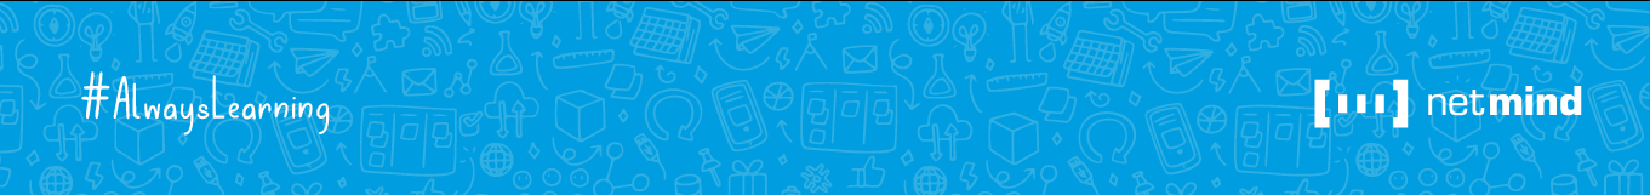
# **Introducción a Spark y PySpark**

## **1. ¿Qué es Apache Spark?**
Apache Spark es un motor de procesamiento distribuido diseñado para manejar grandes volúmenes de datos de manera rápida y eficiente. Es especialmente útil para:
- Procesamiento de datos en paralelo.
- Análisis de big data.
- Machine learning a gran escala.

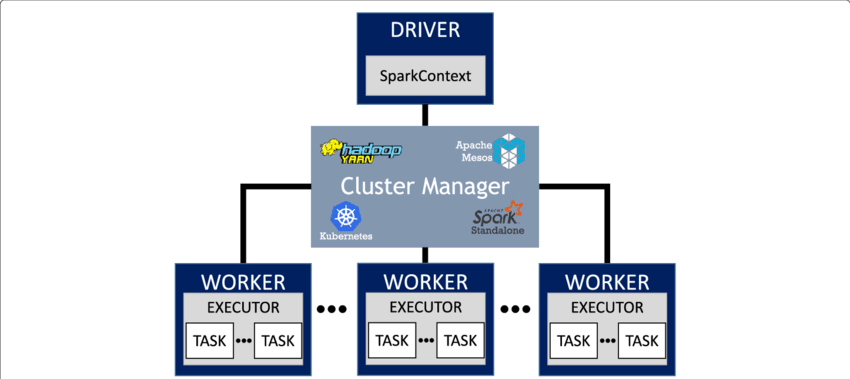

- Más información: https://www.edureka.co/blog/spark-architecture/

## **2. ¿Qué es PySpark?**
PySpark es la API de Python para Apache Spark. 

Permite escribir programas Spark usando Python, lo que facilita su uso para desarrolladores familiarizados con este lenguaje.

#### **Para qué se usa PySpark**
- **Procesamiento de Datos:** Transformar y limpiar grandes conjuntos de datos.
- **Análisis Exploratorio:** Realizar análisis estadísticos rápidos.
- **Machine Learning:** Entrenar modelos en grandes volúmenes de datos.

#### **Funcionamiento:**  
  - Utiliza un modelo de computación distribuida basado en clústeres.
  - Divide los datos en particiones y procesa cada partición en paralelo en múltiples nodos.
  - Proporciona abstracciones como RDDs (Resilient Distributed Datasets) y DataFrames para manipular datos.

#### **Comparación con Pandas**
| **Característica**       | **Pandas**                          | **PySpark**                         |
|--|-|-|
| **Escalabilidad**        | Limitado a datos en memoria local. | Escalable a grandes volúmenes de datos distribuidos. |
| **Velocidad**            | Lento para grandes conjuntos de datos. | Rápido gracias al procesamiento paralelo. |
| **Uso Recomendado**      | Datos pequeños o medianos.         | Grandes volúmenes de datos (Big Data). |

#### **Cuándo usar PySpark:**  
  - Cuando el volumen de datos excede la capacidad de memoria local.
  - Cuando necesitas procesar datos en tiempo real o realizar análisis distribuidos.
  - Para integrar pipelines de machine learning con Big Data.

#### **Más información:**
- [Apache Spark Documentation](https://spark.apache.org/docs/latest/)
- [PySpark vs Pandas Comparison](https://spark.apache.org/docs/latest/api/python/)



## **3: Configuración de PySpark en Azure**  

### **Uso de Azure Databricks para Ejecutar PySpark**
Azure Databricks es un servicio administrado que facilita la ejecución de trabajos de PySpark en clústeres escalables.

- **Pasos para Configurar Azure Databricks:**
  1. Crea un área de trabajo de Databricks en Azure Portal.
  2. Configura un clúster de Spark en Databricks:
     - Selecciona el número de nodos y el tipo de máquina virtual.
     - Instala bibliotecas adicionales si es necesario (e.g., `azure-storage-blob`).
  3. Conecta Databricks con Azure Machine Learning Workspace para integrarlo en pipelines.

#### **Ejemplo: Creación de un Clúster en Databricks**


In [ ]:
from pyspark.sql import SparkSession

# Inicializar SparkSession
spark = SparkSession.builder \
    .appName("ProcesamientoDistribuido") \
    .getOrCreate()

print("Clúster de Spark inicializado.")

### **Conexión con Azure Blob Storage**
Azure Blob Storage es una solución ideal para almacenar grandes volúmenes de datos que se pueden procesar con PySpark.

**Pasos para Conectar Blob Storage:**
  1. Configura una cuenta de almacenamiento en Azure Portal.
  2. Usa la biblioteca `azure-storage-blob` para cargar/descargar datos.
  3. Monta el Blob Storage en Databricks para acceso directo.

#### **Ejemplo: Lectura de Datos desde Blob Storage**


In [ ]:
# Montar Blob Storage en Databricks
dbutils.fs.mount(
    source="wasbs://<container-name>@<storage-account>.blob.core.windows.net",
    mount_point="/mnt/mi-datos",
    extra_configs={"fs.azure.account.key.<storage-account>.blob.core.windows.net": "<storage-key>"}
)

# Leer datos desde Blob Storage
df = spark.read.csv("/mnt/mi-datos/dataset.csv", header=True, inferSchema=True)
df.show()

#### **Más información:**
- [Azure Databricks Documentation](https://learn.microsoft.com/en-us/azure/databricks/)
- [Azure Blob Storage Integration](https://learn.microsoft.com/en-us/azure/storage/blobs/)



## **4: Operaciones Básicas con PySpark**  
### **Lectura y Escritura de Datos**
PySpark permite leer y escribir datos desde múltiples fuentes, como archivos CSV, JSON, Parquet y bases de datos.

#### **Ejemplos:**

```python
# Leer un Archivo CSV
df = spark.read.csv("data.csv", header=True, inferSchema=True)
```

```python
# Escribir un DataFrame
df.write.csv("output.csv", header=True)
```

### **Transformaciones y Acciones**
Las transformaciones son operaciones que crean un nuevo DataFrame sin modificar el original (lazy evaluation). Las acciones ejecutan las transformaciones y devuelven resultados.

#### **Transformaciones Comunes**
- `filter()`: Filtra filas según una condición.
- `groupBy()`: Agrupa datos por una columna.
- `select()`: Selecciona columnas específicas.

#### **Acciones Comunes**
- `show()`: Muestra los primeros registros.
- `count()`: Cuenta el número de filas.
- `collect()`: Devuelve todos los datos como una lista.

#### **Ejemplos:**
```python
# Selección de columnas
df.select("columna1", "columna2").show()

# Filtrado de datos
df.filter(df["edad"] > 30).show()
df_filtered = df.filter(df["Sales"] > 1000)
df_filtered.show()

# Renombrar columnas
df.withColumnRenamed("old_name", "new_name").show()
```

### **Agregaciones y Join de Tablas Distribuidas**
- **Agregaciones:**  
  Realiza operaciones como sumas, promedios y conteos.
  ```python
  # Calcular el promedio de una columna
  df.groupBy("categoria").agg({"valor": "avg"}).show()
  ```

- **Join de Tablas:**  
  Combina múltiples tablas distribuidas.
  ```python
  # Unir dos DataFrames
  df1.join(df2, df1.id == df2.id, "inner").show()
  ```

### **SQL con PySpark**
PySpark permite ejecutar consultas SQL directamente sobre DataFrames.

#### **Ejemplo**
```python
df.createOrReplaceTempView("sales")
result = spark.sql("SELECT Region, SUM(Sales) FROM sales GROUP BY Region")
result.show()
```

### **Más Información**
- [Documentación Oficial de Apache Spark](https://spark.apache.org/docs/latest/)
- [Introducción a PySpark](https://spark.apache.org/docs/latest/api/python/)


## **5: Preprocesamiento de Datos con PySpark**  

PySpark es ideal para preprocesar grandes volúmenes de datos antes de entrenar modelos en Azure ML.

**Pasos Comunes:**
  1. Limpiar y normalizar los datos.
  2. Realizar ingeniería de características.
  3. Exportar los datos procesados para entrenamiento.

#### **Ejemplo: Preprocesamiento con PySpark**


In [ ]:
from pyspark.ml.feature import VectorAssembler, StandardScaler

# Ingeniería de características
assembler = VectorAssembler(inputCols=["feature1", "feature2"], outputCol="features")
df_transformed = assembler.transform(df)

# Normalización
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
scaler_model = scaler.fit(df_transformed)
df_scaled = scaler_model.transform(df_transformed)

df_scaled.show()


### **Ejemplo: Procesamiento de Datos Masivos para un Modelo de Clustering**
Supongamos que queremos entrenar un modelo de clustering en Azure ML utilizando datos procesados con PySpark.

**Pasos:**
1. **Procesamiento con PySpark:**
   - Limpia y transforma los datos.
   - Exporta los datos procesados a Azure Blob Storage.
2. **Entrenamiento del Modelo:**
   - Carga los datos procesados en Azure ML.
   - Entrena un modelo de clustering (e.g., K-Means).

In [ ]:
# Paso 1: Procesamiento con PySpark
df.write.format("parquet").save("/mnt/mi-datos/procesados.parquet")

# Paso 2: Entrenamiento en Azure ML
from azureml.core import Dataset
from sklearn.cluster import KMeans

# Cargar datos procesados
dataset = Dataset.Tabular.from_parquet_files(path=(datastore, 'procesados.parquet'))
X = dataset.to_pandas_dataframe()

# Entrenar modelo
model = KMeans(n_clusters=3)
model.fit(X)

#### **Referencias:**
- [Azure Databricks Documentation](https://learn.microsoft.com/en-us/azure/databricks/)
- [PySpark Documentation](https://spark.apache.org/docs/latest/api/python/)
- [Azure Machine Learning Documentation](https://learn.microsoft.com/en-us/azure/machine-learning/)

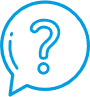
## **¿Preguntas?**


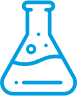
## **Lab**